# Why are their Missing values?? 

Survey--Depression Survey

They hesitate to put down the information
Survey informations are not that valid

Men--salary

Women---age

People may have died----NAN

##### Data Science Projects---Dataset should be collected from multiple sources

# Life Cycle of DataScience Project
___

### 1. Data Collection Strategy 
from commpany side, 3rd-Party API, Surveys

### 2. Feature Engineering
hindling missing values is very important

### 3. 

## What are the different types of Missing Data?

1. ##### Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.


### importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import stat

%matplotlib inline

### loading dataSet

In [4]:
df_titanic = pd.read_csv("titanic.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_titanic.set_index("PassengerId", inplace=True)
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### checking how many columns contains null/ empty values

In [10]:
df_titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Age, Cabin both are containg are very high number of missing values. So we can not directly those those rows. But in Embarked column only 2 missing values, so may be we can directly those rows.

Age and Cabin are related because those who died in titanic accident those were mainly poor people. There is high chance that those people have incomplete data, because they were died. But Embarked column don't have any relation with target variable.
So here **MCAR** column is **Embarked**

In [12]:
filt = df_titanic['Embarked'].isnull() == True

df_titanic[filt]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. ### Missing Data Not At Random(MNAR): Systematic missing Values
There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

Here **Age** and **Cabin** both are **MNAR**, because we have found out their is relation between those feature with target vaiable(Survived).

#### percentage of missing values

In [18]:
df_titanic["Age"].isnull().sum() / df_titanic.shape[0]

0.19865319865319866

In [19]:
df_titanic["Cabin"].isnull().sum() / df_titanic.shape[0]

0.7710437710437711

So Age feature containing almost 20% of its data null and 

   Cabin feature containg almost 78% of its data null

both are very high missing values

In [21]:
df_titanic.groupby(df_titanic["Age"].isnull())["Survived"].value_counts()

Age    Survived
False  0           424
       1           290
True   0           125
       1            52
Name: Survived, dtype: int64

In [30]:
# those rows where Age data was missing, there how many % people survied
df_titanic[df_titanic["Age"].isnull()]["Survived"].value_counts(normalize=True)

0    0.706215
1    0.293785
Name: Survived, dtype: float64

In [15]:
df_titanic[df_titanic["Cabin"].isnull()]["Survived"].value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [31]:
# those rows where Cabin data was missing, there how many % people survied
df_titanic[df_titanic["Cabin"].isnull()]["Survived"].value_counts(normalize=True)

0    0.700146
1    0.299854
Name: Survived, dtype: float64

clearly can say that those people died those data are missing. In Age and Cabin data is skewed towards not-survied.

## 3. Missing At Random(MAR)

Men---hide their salary
Women---hide their age
___

##### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


# 1. Mean/ Median /Mode imputation
Q. When should we apply?

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent(or **mode**) occurance of the variables

if there is outliers then use median or mode. Don't use mean in that case because mean is very sensitive to outliers.

In [35]:
col_names = ['Age', 'Fare', 'Survived']

df_temp = df_titanic.loc[:, col_names]
df_temp.head()

,Age,Fare,Survived
PassengerId,,,
1,22.0,7.2500,0
2,38.0,71.2833,1
3,26.0,7.9250,1
4,35.0,53.1000,1
5,35.0,8.0500,0


In [36]:
df_temp.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [65]:
def impute_nan(df, mode, *variables):
    returnList = []
    
    for variable in variables:
        newName = "new_" + variable + f'_{mode}'
        if mode=='mean':
            fillValue = df[variable].mean()

        elif mode=='median':
            fillValue = df[variable].median()

        elif mode=='mode':
            fillValue = df[variable].mode()

        else:
            raise ValueError("invalid mode")

        df[newName] = df[variable].fillna(fillValue)
        returnList.append(newName)
    return returnList

In [41]:
impute_nan(df_temp, 'median', 'Age')

In [46]:
df_temp

,Age,Fare,Survived,new_Age
PassengerId,,,,
1,22.0,7.2500,0,22.0
2,38.0,71.2833,1,38.0
3,26.0,7.9250,1,26.0
4,35.0,53.1000,1,35.0
5,35.0,8.0500,0,35.0
...,...,...,...,...
887,27.0,13.0000,0,27.0
888,19.0,30.0000,1,19.0
889,NaN,23.4500,0,28.0


In [47]:
print(f"std of {'Age'} = {df_temp['Age'].std()}")
print(f"std of {'new_Age'} = {df_temp['new_Age'].std()}")

std of Age = 14.526497332334044
std of new_Age = 13.019696550973194


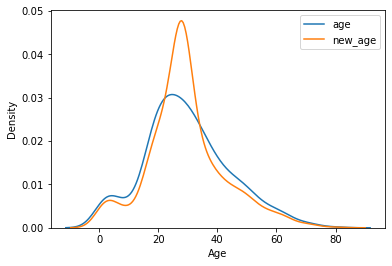

In [58]:
sns.kdeplot('Age', legend='age', data=df_temp)
sns.kdeplot('new_Age', legend='new_age' ,data=df_temp)
plt.legend(['age', 'new_age'])
plt.show()

In [61]:
impute_nan(df_temp, 'mean', 'Age')
df_temp

,Age,Fare,Survived,new_Age,new_Age_mean
PassengerId,,,,,
1,22.0,7.2500,0,22.0,22.000000
2,38.0,71.2833,1,38.0,38.000000
3,26.0,7.9250,1,26.0,26.000000
4,35.0,53.1000,1,35.0,35.000000
5,35.0,8.0500,0,35.0,35.000000
...,...,...,...,...,...
887,27.0,13.0000,0,27.0,27.000000
888,19.0,30.0000,1,19.0,19.000000
889,NaN,23.4500,0,28.0,29.699118


In [62]:
print(f"std of {'Age'} = {df_temp['Age'].std()}")
print(f"std of {'new_Age_mean'} = {df_temp['new_Age_mean'].std()}")

std of Age = 14.526497332334044
std of new_Age_mean = 13.002015226002884


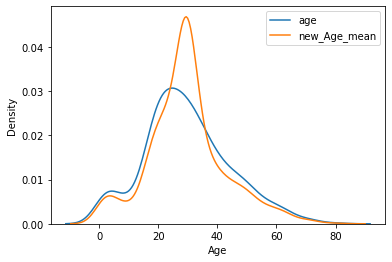

In [75]:
sns.kdeplot('Age', legend='age', data=df_temp)
sns.kdeplot('new_Age_mean', legend='new_Age_mean' ,data=df_temp)
plt.legend(['age', 'new_Age_mean'])
plt.show()

In [80]:
name = impute_nan(df_temp, 'mode', 'Age')
df_temp

,Age,Fare,Survived,new_Age,new_Age_mean,new_Age_mode,new_Age_median
PassengerId,,,,,,,
1,22.0,7.2500,0,22.0,22.000000,22.0,22.0
2,38.0,71.2833,1,38.0,38.000000,38.0,38.0
3,26.0,7.9250,1,26.0,26.000000,26.0,26.0
4,35.0,53.1000,1,35.0,35.000000,35.0,35.0
5,35.0,8.0500,0,35.0,35.000000,35.0,35.0
...,...,...,...,...,...,...,...
887,27.0,13.0000,0,27.0,27.000000,27.0,27.0
888,19.0,30.0000,1,19.0,19.000000,19.0,19.0
889,NaN,23.4500,0,28.0,29.699118,NaN,28.0


In [72]:
print(f"std of {'Age'} = {df_temp['Age'].std()}")
print(f"std of {name[0]} = {df_temp[name[0]].std()}")

std of Age = 14.526497332334044
std of new_Age_mode = 14.526497332334044


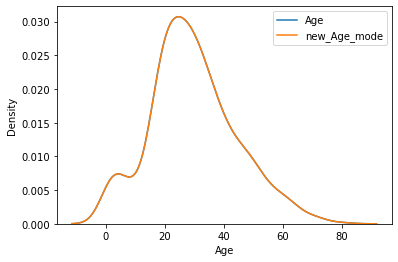

In [76]:
sns.kdeplot('Age', legend='Age', data=df_temp)
sns.kdeplot('new_Age_mode', legend='new_Age_mode' ,data=df_temp)
plt.legend(['Age', 'new_Age_mode'])
plt.show()

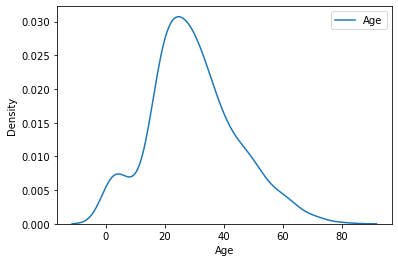

In [78]:
sns.kdeplot('Age', legend='Age', data=df_temp)
# sns.kdeplot('new_Age_mode', legend='new_Age_mode' ,data=df_temp)
plt.legend(['Age', 'new_Age_mode'])
plt.show()

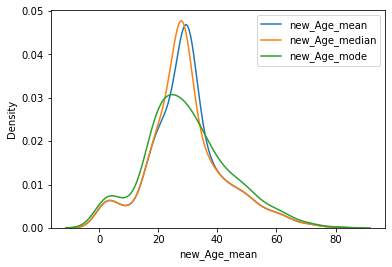

In [81]:
sns.kdeplot('new_Age_mean', legend='new_Age_mean' ,data=df_temp)
sns.kdeplot('new_Age_median', legend='new_Age_median' ,data=df_temp)
sns.kdeplot('new_Age_mode', legend='new_Age_mode' ,data=df_temp)
plt.legend(['new_Age_mean',"new_Age_median" ,'new_Age_mode'])
plt.show()

In [83]:
print(f"std of {'Age'} = {df_temp['Age'].std()}")
print(f"var of {'Age'} = {df_temp['Age'].var()}")

print('=' * 40)

print(f"std of {'new_Age_mean'} = {df_temp['new_Age_mean'].std()}")
print(f"std of {'new_Age_median'} = {df_temp['new_Age_median'].std()}")
print(f"std of {'new_Age_mode'} = {df_temp['new_Age_mode'].std()}")

print('=' * 40)

print(f"var of {'new_Age_mean'} = {df_temp['new_Age_mean'].var()}")
print(f"var of {'new_Age_median'} = {df_temp['new_Age_median'].var()}")
print(f"var of {'new_Age_mode'} = {df_temp['new_Age_mode'].var()}")

std of Age = 14.526497332334044
var of Age = 211.0191247463081
std of new_Age_mean = 13.002015226002884
std of new_Age_median = 13.019696550973194
std of new_Age_mode = 14.526497332334044
var of new_Age_mean = 169.05239993721085
var of new_Age_median = 169.51249827942328
var of new_Age_mode = 211.0191247463081


### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation
